In [ ]:
import numpy as np
import matplotlib.pyplot as plt

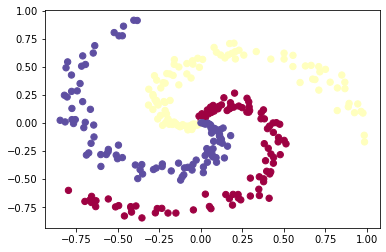

In [9]:
import numpy as np
import matplotlib.pyplot as plt
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [20]:
h=100 #neurons
reg = 1e-3 # regularization strength
step_size = 1e-1
W1 = 0.01 * np.random.randn(D,h)
b1=np.ones((1,h))
h2=150 
W2=0.01 * np.random.randn(h,h2)
b2=np.ones((1,h2))
W3=0.01 * np.random.randn(h2,K)
b3=np.ones((1,K))
N=X.shape[0]
#Forward pass
def forward():
    hidden_layer1=np.maximum(0,np.dot(X,W1))+b1
    hidden_layer2=np.maximum(0,np.dot(hidden_layer1,W2))+b2
    scores=np.dot(hidden_layer2,W3)+b3
    scores=scores-np.max(scores)#toa avoid overflow
    probscores=np.exp(scores)/np.sum(np.exp(scores),keepdims=True,axis=1)
    loss=-np.log(probscores[np.arange(N),y])
    reg_loss = 0.5*reg*np.sum(W1*W1)+0.5*reg*np.sum(W2*W2)+0.5*reg*np.sum(W3*W3)
    loss=np.sum(loss)/N+reg_loss
    return loss,probscores,hidden_layer2,hidden_layer1

In [21]:
#Backprop

def backprop(probscores,hidden_layer2,hidden_layer1):
    dscores=probscores
    dscores[np.arange(N),y]-=1
    dscores/=N
    dW3=np.dot(dscores.T,hidden_layer2).T
    db3=np.sum(dscores,axis=0,keepdims=True)
    dhidden_layer2=np.dot(dscores,W3.T)
    dhidden_layer2[hidden_layer2<=0]=0
    dW2=np.dot(hidden_layer1.T,dhidden_layer2)
    db2=np.sum(dhidden_layer2,axis=0,keepdims=True)
    dhidden_layer1=np.dot(W2,dhidden_layer2.T)
    dhidden_layer1[hidden_layer1.T<=0]=0
    dW1=np.dot(dhidden_layer1,X).T
    db1=np.sum(dhidden_layer1.T,axis=0,keepdims=True)
    dW3+=reg*W3
    dW2 += reg * W2
    dW1 += reg * W1
    #update
    return dW1,dW2,dW3,db1,db2,db3


In [22]:
for i in range(10000):
    loss,probscores,hidden_layer2,hidden_layer1=forward()
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))
    dW1,dW2,dW3,db1,db2,db3=backprop(probscores,hidden_layer2,hidden_layer1)
    W1 -= step_size * dW1
    b1 -= step_size * db1
    W2 -= step_size * dW2
    b2 -= step_size * db2
    W3-= step_size * dW3
    b3-=step_size * db3

iteration 0: loss 1.108022
iteration 1000: loss 93.046732
iteration 2000: loss 78.475691
iteration 3000: loss 67.271956
iteration 4000: loss 62.473845
iteration 5000: loss 76.316805


C:\Users\chira\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\Users\chira\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
C:\Users\chira\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less_equal
  # Remove the CWD from sys.path while we load stuff.
C:\Users\chira\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less_equal
  


iteration 6000: loss nan
iteration 7000: loss nan
iteration 8000: loss nan
iteration 9000: loss nan


In [ ]:
hidden_layer1=np.maximum(0,np.dot(X,W1))+b1
hidden_layer2=np.maximum(0,np.dot(hidden_layer1,W2))+b2
scores=np.dot(hidden_layer2,W3)+b3
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))